In [8]:
import pandas as pd

insurance_df = pd.read_csv("../data/insurance.csv")

In [9]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


各変数の意味<br>
`age` : 年齢（`int`）<br>
`sex` : 性別（`str`）<br>
`bmi` : BMI指数（`float`）<br>
`children` : 子供の数（`int`）<br>
`smoker` : 喫煙者かどうか（`str`）<br>
`region` : 住んでいる地域（`str`）<br>
`charges` : 個人医療費（`float`）<br>

`charges` を目的変数として回帰モデルを作成する方針

In [10]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Distribution of Charges')

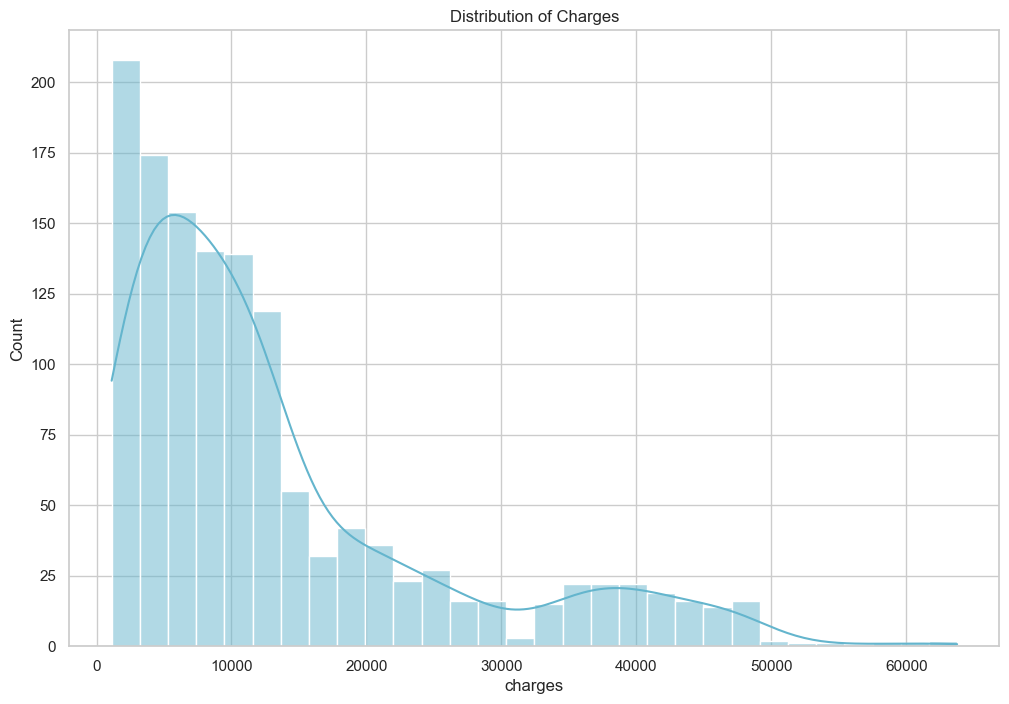

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(insurance_df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

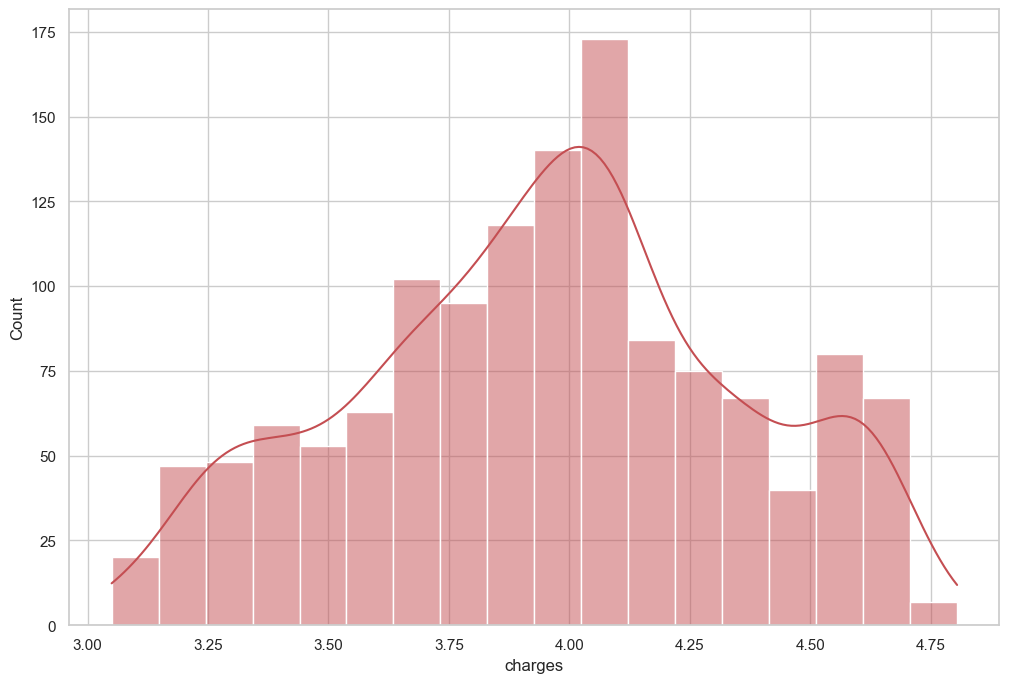

In [13]:
import numpy as np

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(np.log10(insurance_df['charges']), kde = True, color = 'r' )

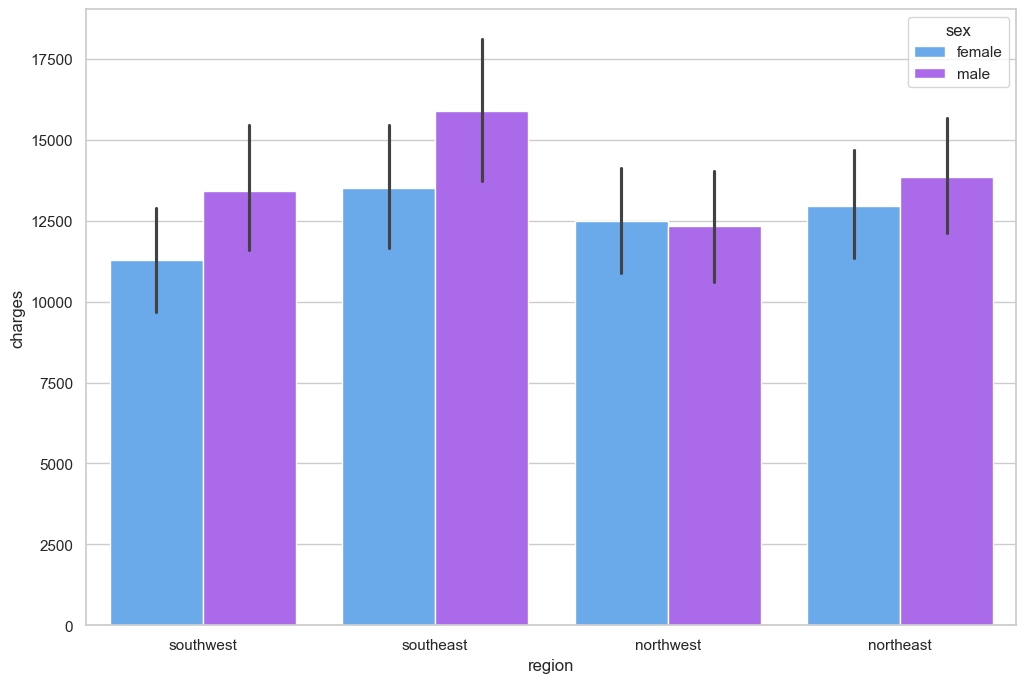

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=insurance_df, palette='cool')

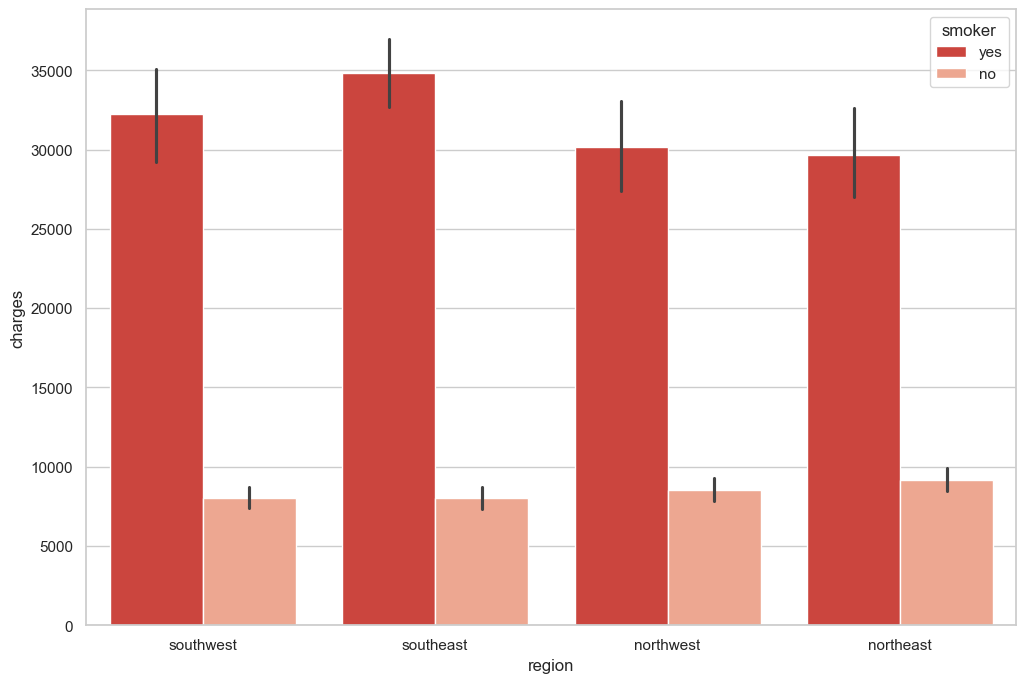

In [15]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=insurance_df, palette='Reds_r')

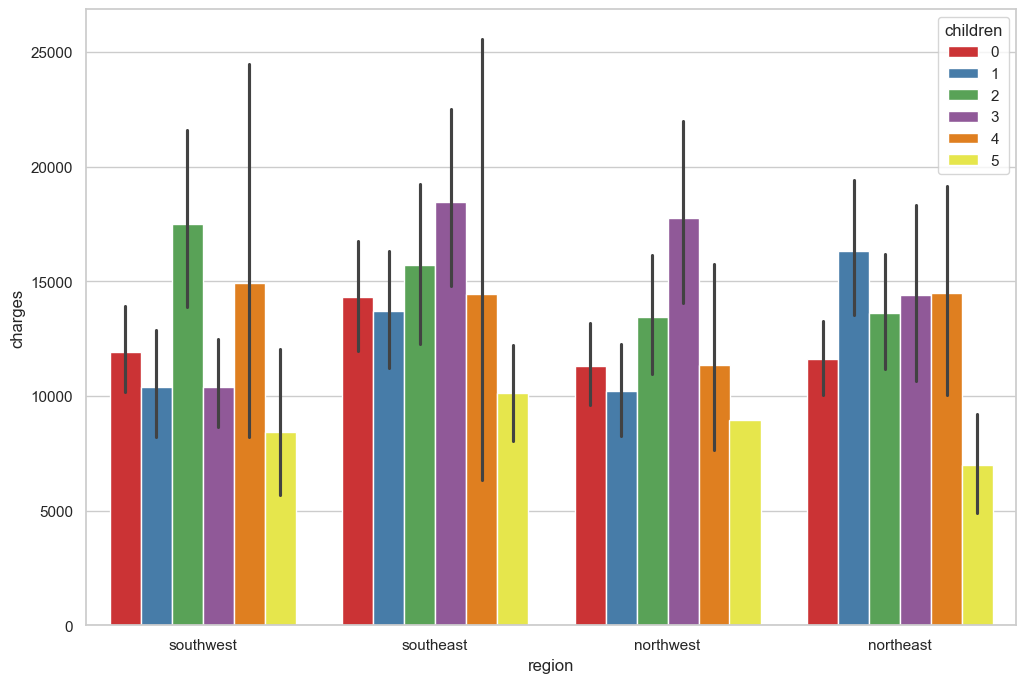

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=insurance_df, palette='Set1')

<Axes: xlabel='children', ylabel='charges'>

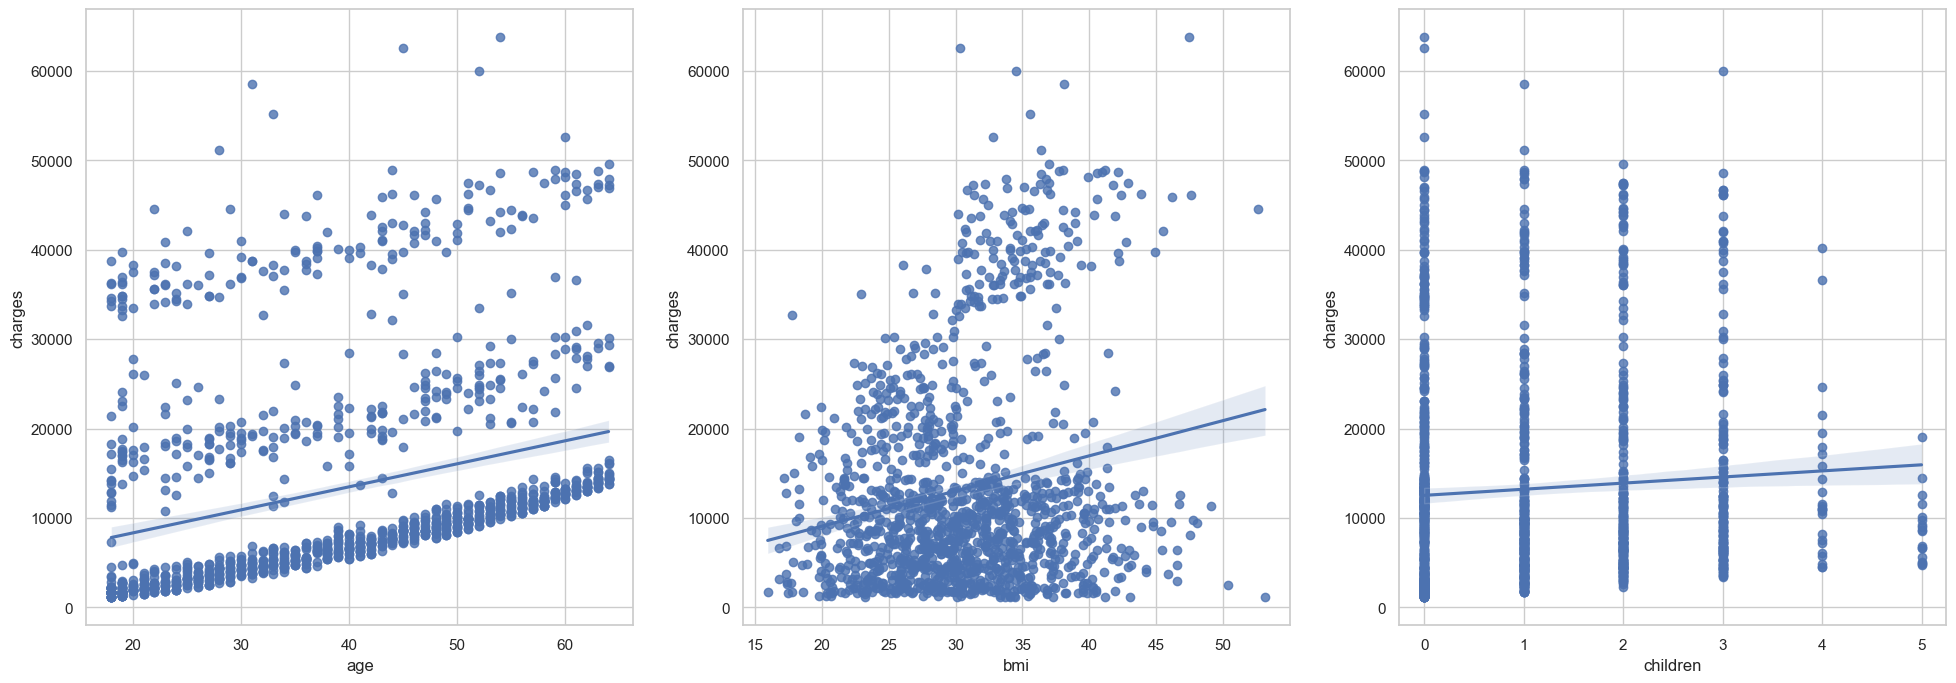

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

sns.regplot(x='age', y='charges', data=insurance_df, ax=axs[0])
sns.regplot(x='bmi', y='charges', data=insurance_df, ax=axs[1])
sns.regplot(x='children', y='charges', data=insurance_df, ax=axs[2])

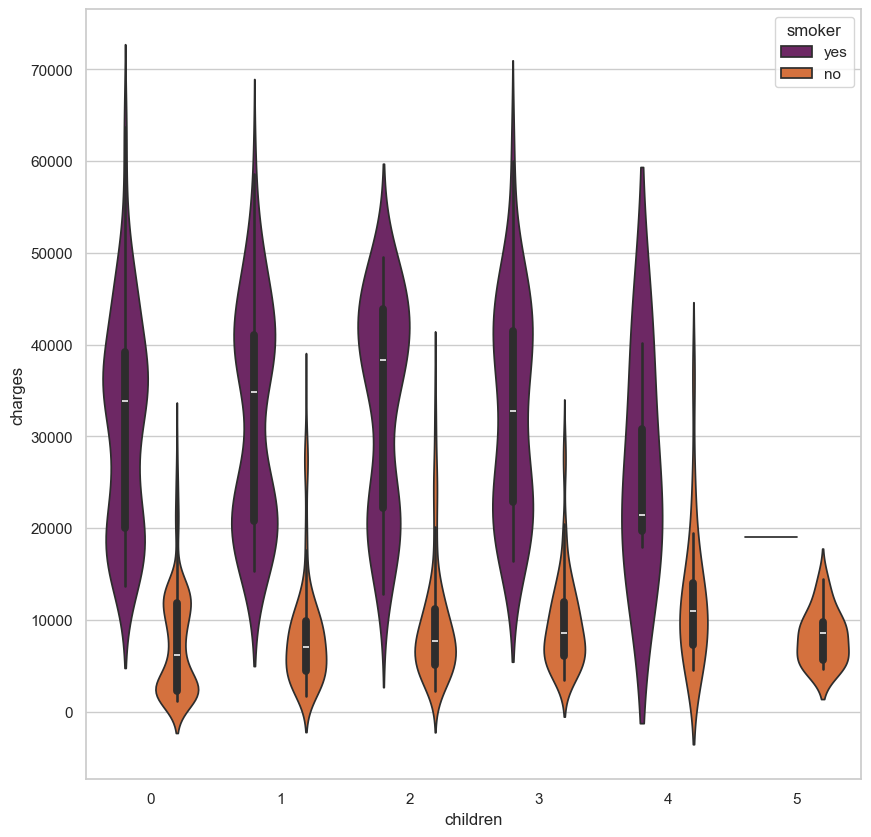

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=insurance_df, orient='v', hue='smoker', palette='inferno')

In [19]:
##Converting objects labels into categorical
insurance_df[['sex', 'smoker', 'region']] = insurance_df[['sex', 'smoker', 'region']].astype('category')
insurance_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [20]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)
label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)
label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)
insurance_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

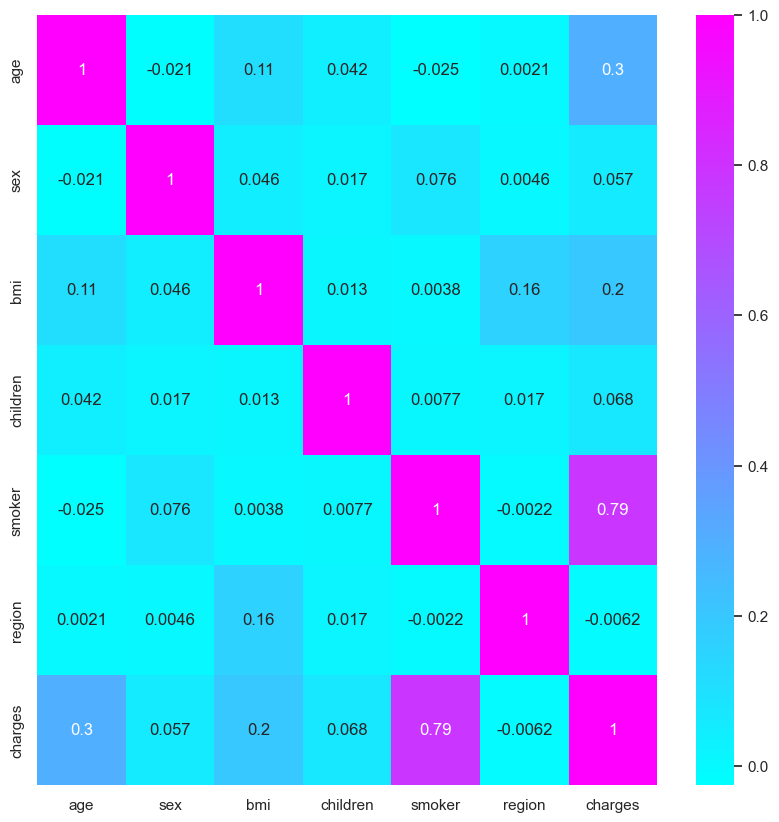

In [21]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_df.corr(), annot=True, cmap='cool')

In [22]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824395
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449958


In [23]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.44092749581
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


In [24]:
from sklearn.linear_model import Lasso

Lasso = Lasso(
    alpha=0.2, 
    fit_intercept=True, 
    precompute=False, 
    max_iter=1000,
    tol=0.0001, 
    warm_start=False, 
    positive=False, 
    random_state=None, 
    selection='cyclic'
)
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


In [25]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = insurance_df.drop(['charges'], axis=1)
y = insurance_df.charges

Rfr = rfr(
    n_estimators = 100, 
    criterion = 'friedman_mse',
    random_state = 1,
    n_jobs = -1
)

Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print(
    'MSE train data: %.3f, MSE test data: %.3f' % 
    (metrics.mean_squared_error(x_train_pred, y_train), metrics.mean_squared_error(x_test_pred, y_test))
)
print(
    'R2 train data: %.3f, R2 test data: %.3f' % 
    (metrics.r2_score(y_train, x_train_pred), metrics.r2_score(y_test, x_test_pred))
)

MSE train data: 3627543.313, MSE test data: 19580381.390
R2 train data: 0.975, R2 test data: 0.877


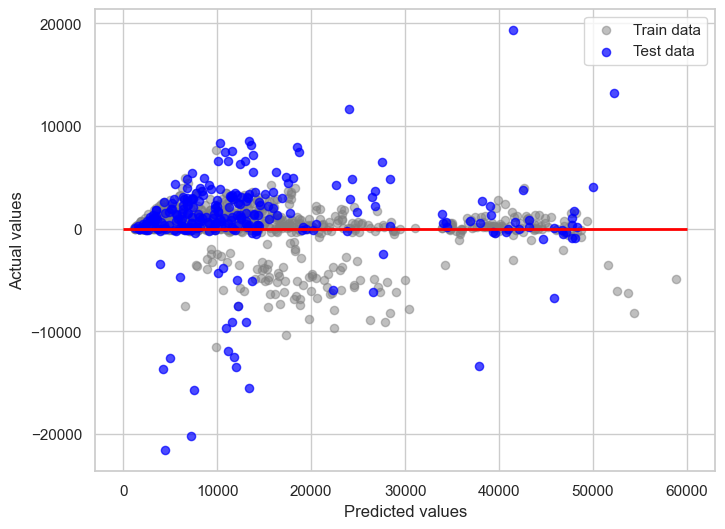

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
            c = 'gray', marker = 'o', s = 35, alpha = 0.5,
            label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
            c = 'blue', marker = 'o', s = 35, alpha = 0.7,
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

In [27]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []

# モデルが使用している特徴量の数を取得
num_features = x.shape[1]

for f in range(num_features):
    # 特徴量の名前が不明な場合は、インデックスを使用
    variable = f"Feature {indices[f]}"
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

Feature importance ranking


1.Feature 4(0.601678)
2.Feature 2(0.218492)
3.Feature 0(0.136950)
4.Feature 3(0.021107)
5.Feature 5(0.015409)
6.Feature 1(0.006364)


In [28]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []

print(len(indices))
print(indices)
print(indices[0])
print(x.shape)

for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(importance_list, importances[indices], color="y", yerr=std[indices], align="center")

Feature importance ranking


6
[4 2 0 3 5 1]
4
(1338, 6)
1.smoker(0.601678)
2.bmi(0.218492)
3.age(0.136950)
4.children(0.021107)
5.region(0.015409)
6.sex(0.006364)


In [29]:
from sklearn.preprocessing import PolynomialFeatures
x = insurance_df.drop(['charges', 'sex', 'region'], axis = 1)
y = insurance_df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252648
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345242


In [30]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776167
Mean Squared Error: 18895160.09878017
Root Mean Squared Error: 4346.85634669242


In [31]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
